# Sentinel-2 Satellite Image Analysis with Python

In [1]:
from glob import glob
import os

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
# used for plotting
from rasterio.plot import show
import matplotlib.pyplot as plt
from tqdm import tqdm 

import pandas as pd

### Read Landsat 5:
- Band 1 Visible Blue (0.45 - 0.52 µm) 30 m
- Band 2 Visible Green (0.52 - 0.60 µm) 30 m
- Band 3 Visible Red (0.63 - 0.69 µm) 30 m
- Band 4 Near-Infrared (0.76 - 0.90 µm) 30 m
- Band 5 Near-Infrared (1.55 - 1.75 µm) 30 m
- Band 6 Thermal (10.40 - 12.50 µm) 120 m
- Band 7 Mid-Infrared (2.08 - 2.35 µm) 30 m


In [2]:
# opening landsat data
path_1 = r"/home/throgg/Documents/Code/python/teledec/Landsat/07_04_2010/" # oldest
path_2 = r"/home/throgg/Documents/Code/python/teledec/Landsat/09_05_2010/" # newer
path_3 = r"/home/throgg/Documents/Code/python/teledec/Landsat/25_05_2010/" # newest
paths = [path_1, path_2, path_3]

os.chdir(path_1)

In [3]:
# Image T1
os.chdir(path_1)
selection_1 = [
    glob("*_B1.TIF")[0], # Visible blue
    glob("*_B2.TIF")[0], # Visible green
    glob("*_B3.TIF")[0], # Visible red
    glob("*_B4.TIF")[0], # Near infrared 1
    glob("*_B5.TIF")[0], # Near infrared 2
    glob("*_B6.TIF")[0], # Thermal
    glob("*_B7.TIF")[0], # Mid-infrared
]
α1 = []
for img in selection_1:
    with rio.open(img, 'r') as f:
        α1.append(f.read(1))
image_1 = np.stack(α1)


# Image T2
os.chdir(path_2)
selection_2 = [
    glob("*_B1.TIF")[0], # Visible blue
    glob("*_B2.TIF")[0], # Visible green
    glob("*_B3.TIF")[0], # Visible red
    glob("*_B4.TIF")[0], # Near infrared 1
    glob("*_B5.TIF")[0], # Near infrared 2
    glob("*_B6.TIF")[0], # Thermal
    glob("*_B7.TIF")[0], # Mid-infrared
]
α2 = []
for img in selection_2:
    with rio.open(img, 'r') as f:
        α2.append(f.read(1))
image_2 = np.stack(α2)

# Image T3
os.chdir(path_3)
α3 = []
selection_3 = [
    glob("*_B1.TIF")[0], # Visible blue
    glob("*_B2.TIF")[0], # Visible green
    glob("*_B3.TIF")[0], # Visible red
    glob("*_B4.TIF")[0], # Near infrared 1
    glob("*_B5.TIF")[0], # Near infrared 2
    glob("*_B6.TIF")[0], # Thermal
    glob("*_B7.TIF")[0], # Mid-infrared
]
α3 = []
for img in selection_3:
    with rio.open(img, 'r') as f:
        α3.append(f.read(1))
image_3 = np.stack(α3)


# Plotting
This part is about plotting the data the we fused just above. 

## Plotting bands seperately
We will start by plotting each band of each three images one by one.
- The first row => bands of image 1
- The second row => bands of image 2
- The third row => bands of image 3

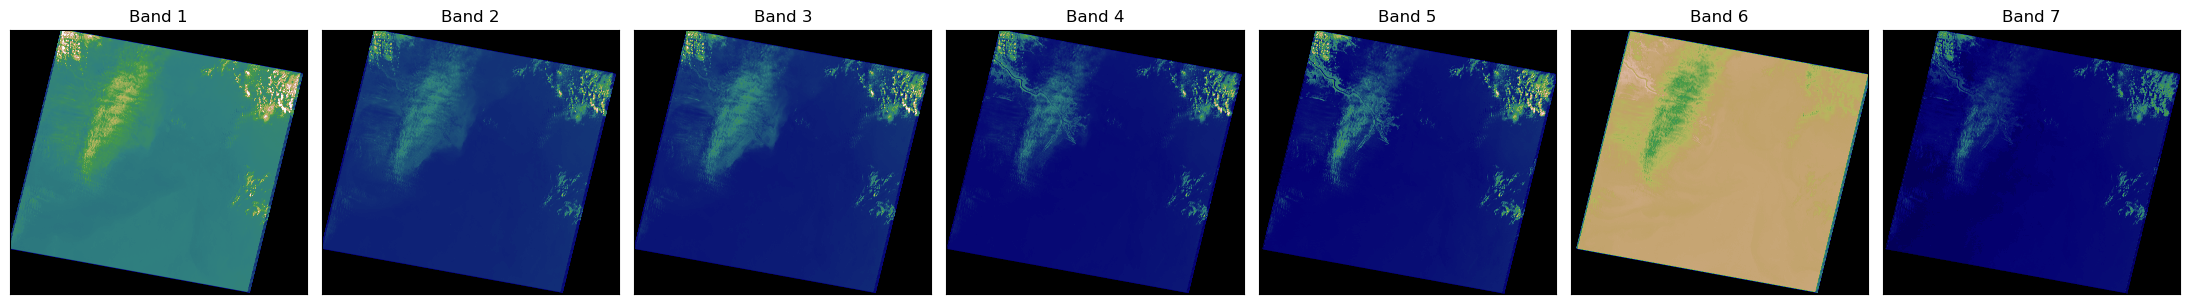

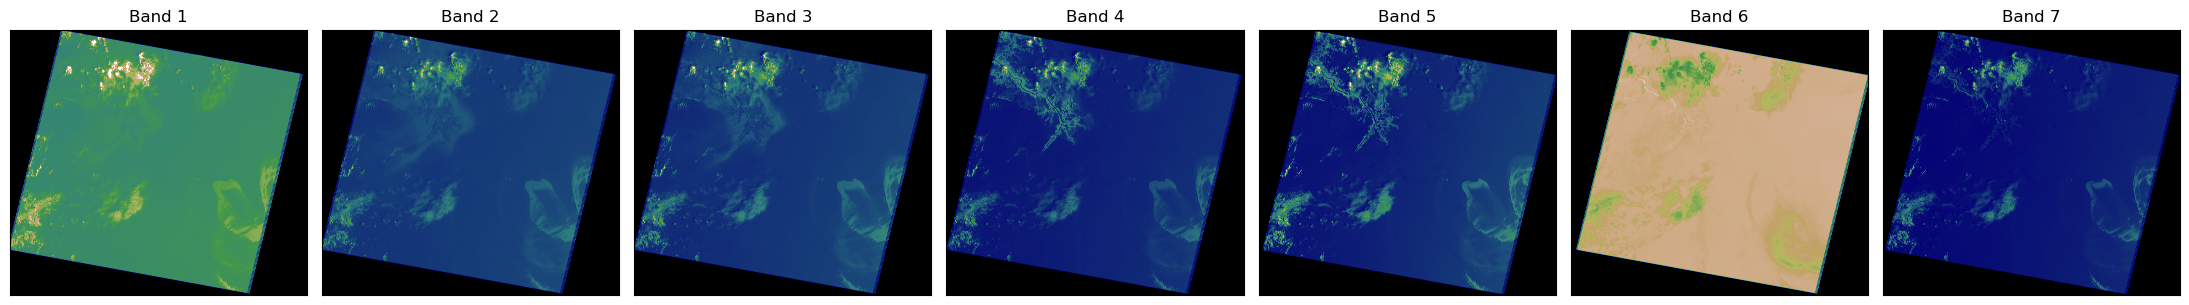

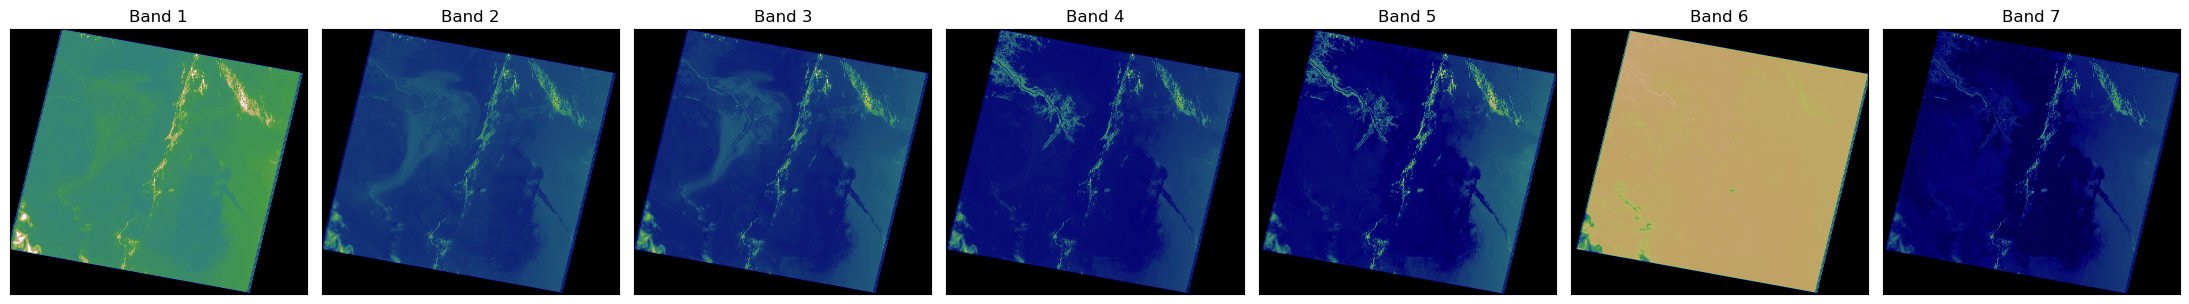

In [4]:
myplots = [image_1, image_2, image_3]
for plot in myplots:
    ep.plot_bands(
        arr = plot, 
        cmap = 'gist_earth',
        figsize = (22, 10), 
        cols = 7,
        cbar = False,
    )

## Making RGB image
Now that we have fuse each band seperatly we will now create RGB rendering of image 1, 2 and 3. 
For that we use the **plot_rgb** function, don't forget to set stretch to true or the colors will seem distorted.

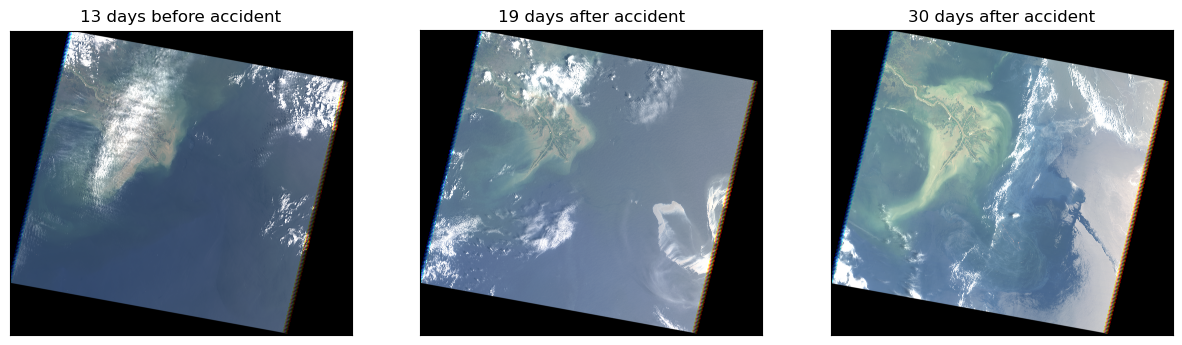

In [5]:
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
ep.plot_rgb(arr = image_1, rgb = (2, 1, 0), figsize =(20, 10), stretch = True, ax = axs[0])
ep.plot_rgb(arr = image_2, rgb = (2, 1, 0), figsize =(20, 10), stretch = True, ax = axs[1])
ep.plot_rgb(arr = image_3, rgb = (2, 1, 0), figsize =(20, 10), stretch = True, ax = axs[2])
# setting titles for each plot
axs[0].set_title('13 days before accident')
axs[1].set_title('19 days after accident')
axs[2].set_title('30 days after accident')

plt.show()

## Chemical analysis
The following compositions are used to highlight specific caracteristics of the images.

### NDVI
To figure out green vegetation within an image, specific wavelengths of visible and Near-Infrared (NIR) reflected by the plants are to be analysed.
NDVI computes this desired vegetation as the difference between NIR (strongly reflected by vegetation) and red light (absorbed by vegetation).

$NDVI \in \left(-1, +1\right)$

$NDVI = \frac{NIR - Red}{NIR + Red}$

For negative values, it's probably water. Whereas, for values close to +1, it’s probably dense green leaves. While, values close to zero might indicate  an urbanized area which doesn't have much green leaves.

/home/throgg/anaconda3/envs/teledec/lib/python3.9/site-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in divide
  n_diff = (b1 - b2) / (b1 + b2)
/home/throgg/anaconda3/envs/teledec/lib/python3.9/site-packages/earthpy/spatial.py:109: Warning: Divide by zero produced infinity values that will be replaced with nan values
  warnings.warn(


Text(0.5, 1.0, '30 days after accident')

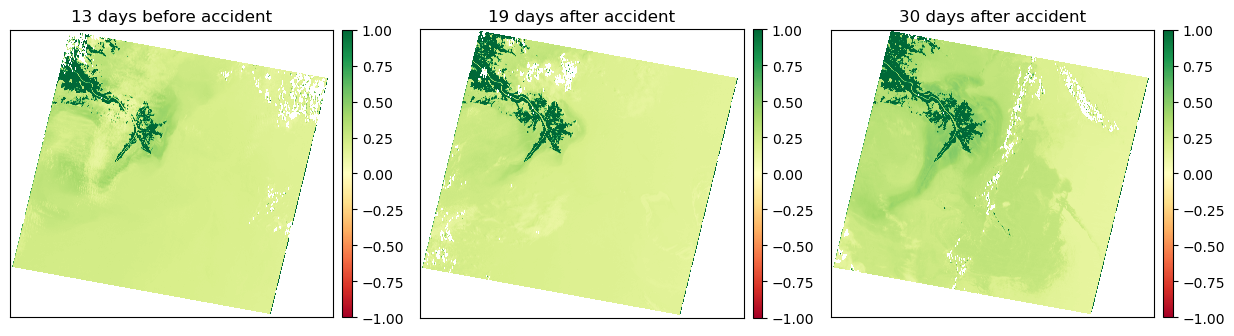

In [6]:
# Create NDVI datasets
ndvi_1 = es.normalized_diff(image_1[2], image_1[3]) # NIR += Red
ndvi_2 = es.normalized_diff(image_2[2], image_2[3]) # NIR += Red
ndvi_3 = es.normalized_diff(image_3[2], image_3[3]) # NIR += Red
# Plotting NDVI datasets
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
# Creating subplots
ep.plot_bands(arr = ndvi_1, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[0])
ep.plot_bands(arr = ndvi_2, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[1])
ep.plot_bands(arr = ndvi_3, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[2])
# setting titles for each plot
axs[0].set_title('13 days before accident')
axs[1].set_title('19 days after accident')
axs[2].set_title('30 days after accident')

### Soil Adjusted Vegetation Index (SAVI):

SAVI is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

$SAVI = \frac{NIR - Red}{NIR + Red + L} \times (1 + L)$

The value of _L_ depends on the geographic location's amount of vegetation. Usually:

- for areas having no green vegetation cover, L = 1
- for areas of moderate green vegetation cover, L = 0.5
- for areas of high vegetation cover, L = 0 (this is equivalent to NDVI method of above)

$SAVI \in \left(-1.0, +1.0\right)$

Text(0.5, 1.0, '30 days after accident')

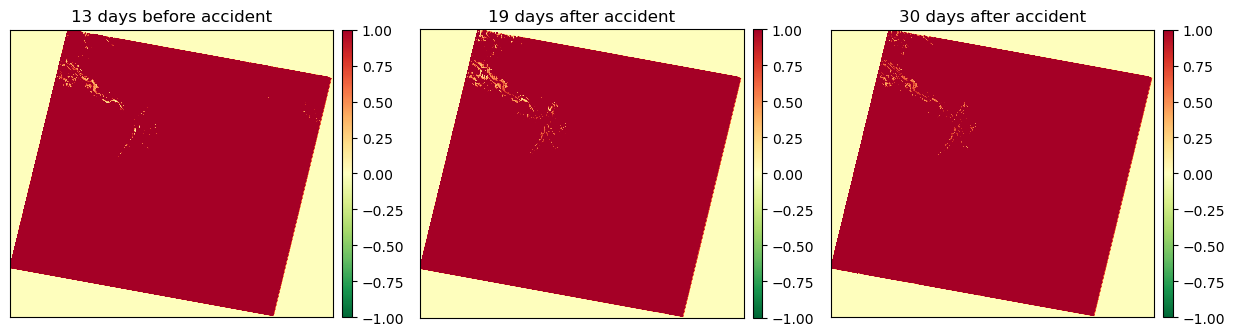

In [7]:
# Create SAVI datasets
L = 0.4
savi_1 = ((image_1[3] - image_1[2])/ (image_1[3] + image_1[2] + L))* (1 + L)
savi_2 = ((image_2[3] - image_2[2])/ (image_2[3] + image_2[2] + L))* (1 + L)
savi_3 = ((image_3[3] - image_3[2])/ (image_3[3] + image_3[2] + L))* (1 + L)
# Plotting SAVI datasets
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
# Creating subplots
ep.plot_bands(arr = savi_1, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[0])
ep.plot_bands(arr = savi_2, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[1])
ep.plot_bands(arr = savi_3, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[2])
# setting titles for each plot
axs[0].set_title('13 days before accident')
axs[1].set_title('19 days after accident')
axs[2].set_title('30 days after accident')

### Visible Atmospherically Resistant Index (VARI):

VARI is constructed to highlight vegetation in the visible spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

$VARI = \frac{Green - Red}{Green + Red - Blue}$
> It seems to be rather good at detecting the presence of hydrocarbons in the water

/tmp/ipykernel_16165/3869917923.py:2: RuntimeWarning: divide by zero encountered in divide
  vari_1 = ((image_1[1] - image_1[2])/ (image_1[1] + image_1[2] - image_1[0]))
/tmp/ipykernel_16165/3869917923.py:2: RuntimeWarning: invalid value encountered in divide
  vari_1 = ((image_1[1] - image_1[2])/ (image_1[1] + image_1[2] - image_1[0]))
/tmp/ipykernel_16165/3869917923.py:3: RuntimeWarning: divide by zero encountered in divide
  vari_2 = ((image_2[1] - image_2[2])/ (image_2[1] + image_2[2] - image_2[0]))
/tmp/ipykernel_16165/3869917923.py:3: RuntimeWarning: invalid value encountered in divide
  vari_2 = ((image_2[1] - image_2[2])/ (image_2[1] + image_2[2] - image_2[0]))
/tmp/ipykernel_16165/3869917923.py:4: RuntimeWarning: divide by zero encountered in divide
  vari_3 = ((image_3[1] - image_3[2])/ (image_3[1] + image_3[2] - image_3[0]))
/tmp/ipykernel_16165/3869917923.py:4: RuntimeWarning: invalid value encountered in divide
  vari_3 = ((image_3[1] - image_3[2])/ (image_3[1] + image_3[2

Text(0.5, 1.0, '30 days after accident')

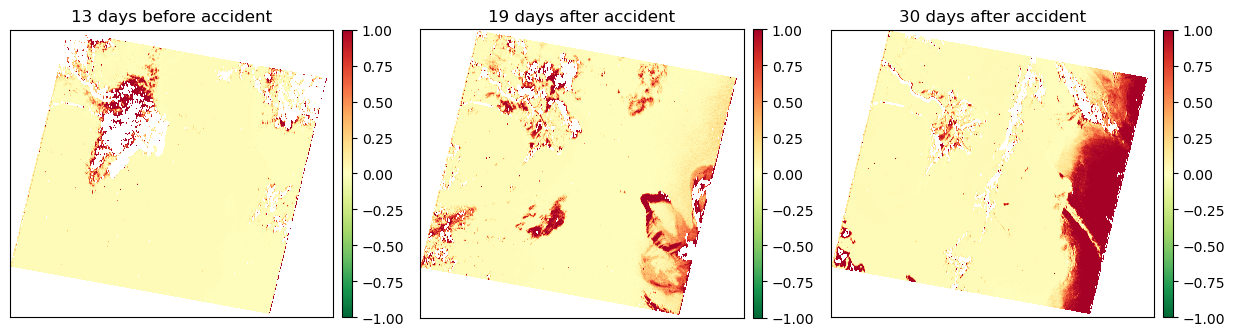

In [12]:
# Calculating VARI
vari_1 = ((image_1[1] - image_1[2])/ (image_1[1] + image_1[2] - image_1[0]))
vari_2 = ((image_2[1] - image_2[2])/ (image_2[1] + image_2[2] - image_2[0]))
vari_3 = ((image_3[1] - image_3[2])/ (image_3[1] + image_3[2] - image_3[0]))
# Plotting VARI
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
# Creating subplots
ep.plot_bands(arr = vari_1, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[0])
ep.plot_bands(arr = vari_2, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[1])
ep.plot_bands(arr = vari_3, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[2])
# setting titles for each plot
axs[0].set_title('13 days before accident')
axs[1].set_title('19 days after accident')
axs[2].set_title('30 days after accident')

#### Statistical analysis for VARI
Vari seems to show promise in detecting hydrocarbons in the water. This part will serve to further our understanding of how the oil spreads. 

## Water Indices:

Remote sensing satellites such as Sentinel-2, etc. have consistently provided data which are helpful for extracting different types of land cover such as forest and water. Amongst the various proposed surface water extraction techniques, index-based methods are favored due to their simplicity and computational ease.


### Modified Normalized Difference Water Index (MNDWI):

MDWI employs SWIR and Green bands for enhancing water features while diminishing built-up area features which are often correlated with open water in other indices.

$MNDWI = \frac{Green - SWIR}{Green + SWIR}$

SWIR stands for short range infrared infrared imagery with wavelengths between 1196 to 2365 nm base on this [link](https://www.euspaceimaging.com/wp-content/uploads/2018/06/EUSI-SWIR.pdf)

That would make it more or less equivalent to Band 5 Near-Infrared (1550 - 1750 nm) on landsat 5. 

<Axes: >

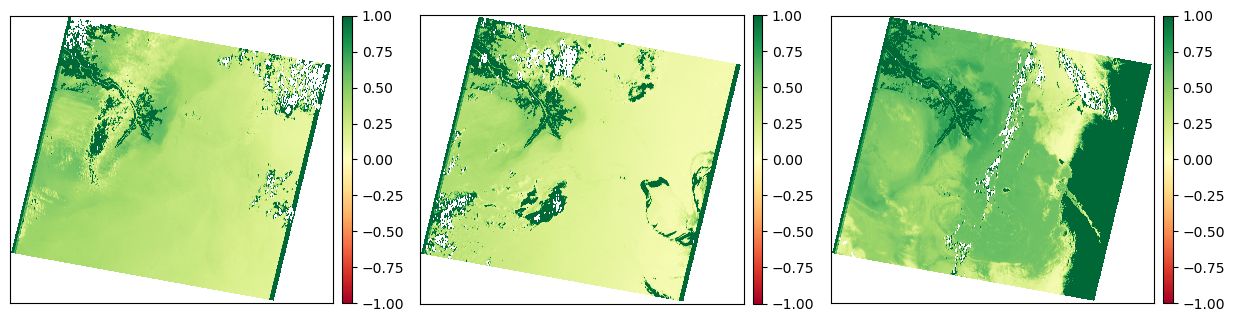

In [9]:
# Calculating MNDWI
MNDWI_1 = es.normalized_diff(image_1[1], image_1[4]) # Green - SWIR
MNDWI_2 = es.normalized_diff(image_2[1], image_2[4]) # Green - SWIR
MNDWI_3 = es.normalized_diff(image_3[1], image_3[4]) # Green - SWIR
# Plotting 
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
# Creating subplots
ep.plot_bands(arr = MNDWI_1, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[0])
ep.plot_bands(arr = MNDWI_2, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[1])
ep.plot_bands(arr = MNDWI_3, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[2])

#### Statistical analysis for MNDWI
Like VARI, this indicator seems to be rather good @ indentifying the presence of hydrocarbons in the water. 

##### Scatter plot
Here we are plotting Red vs PIR in a scatter plot

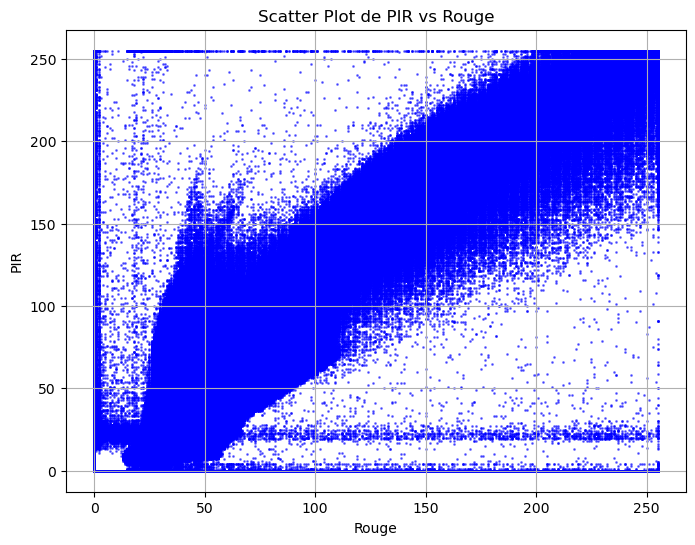

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(image_1[2], image_1[4], s=1, c='b', alpha=0.5)
plt.xlabel('Rouge')
plt.ylabel('PIR')
plt.title('Scatter Plot de Green vs SWIR')
plt.grid(True)
plt.show()

##### Band statistics
Doing some basic stats on the values of our image

In [14]:
band_stats = {
    f'Bande {i+1}': {
        'Moyenne': np.mean(band),
        'Écart-type': np.std(band),
        'Médiane': np.median(band),
        'Variance': np.var(band),
        'Minimum': np.min(band),
        'Maximum': np.max(band),
    } for i, band in enumerate(image_1)
}

band_stats_df = pd.DataFrame(band_stats)
band_stats_df


Bande 1     Bande 2     Bande 3     Bande 4     Bande 5  \
Moyenne       57.385291   22.553107   20.643756   14.290408   15.339965   
Écart-type    44.879132   21.649376   23.566166   19.380279   24.118407   
Médiane       70.000000   24.000000   19.000000   12.000000   12.000000   
Variance    2014.136462  468.695475  555.364166  375.595228  581.697552   
Minimum        0.000000    0.000000    0.000000    0.000000    0.000000   
Maximum      255.000000  255.000000  255.000000  255.000000  255.000000   

                Bande 6     Bande 7  
Moyenne       84.678777    9.440531  
Écart-type    57.634552   14.233756  
Médiane      125.000000    8.000000  
Variance    3321.741624  202.599808  
Minimum        0.000000    0.000000  
Maximum      159.000000  255.000000

##### Band correlation
We are going to see if the green band is correlated with the SWIR band

In [17]:
# corrélations entre bandes
correlation_matrix = np.corrcoef(image_1.reshape(image_1.shape[0], -1))
correlation_df = pd.DataFrame(correlation_matrix, columns=[f'Bande {i+1}' for i in range(7)],
                               index=[f'Bande {i+1}' for i in range(7)])
correlation_df

Bande 1   Bande 2   Bande 3   Bande 4   Bande 5   Bande 6   Bande 7
Bande 1  1.000000  0.936328  0.877502  0.793913  0.715681  0.696242  0.734192
Bande 2  0.936328  1.000000  0.968535  0.902426  0.817064  0.551124  0.820454
Bande 3  0.877502  0.968535  1.000000  0.943330  0.868996  0.453657  0.868753
Bande 4  0.793913  0.902426  0.943330  1.000000  0.927860  0.382606  0.909036
Bande 5  0.715681  0.817064  0.868996  0.927860  1.000000  0.344544  0.956018
Bande 6  0.696242  0.551124  0.453657  0.382606  0.344544  1.000000  0.356314
Bande 7  0.734192  0.820454  0.868753  0.909036  0.956018  0.356314  1.000000

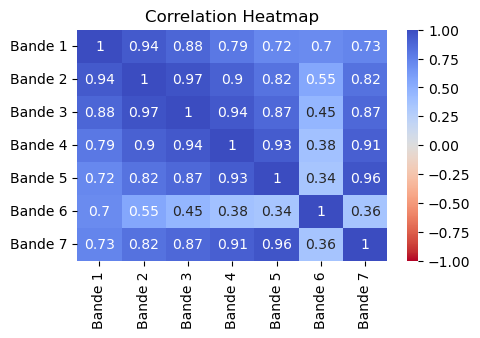

In [20]:
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

##### Supervised classification

/home/throgg/anaconda3/envs/teledec/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


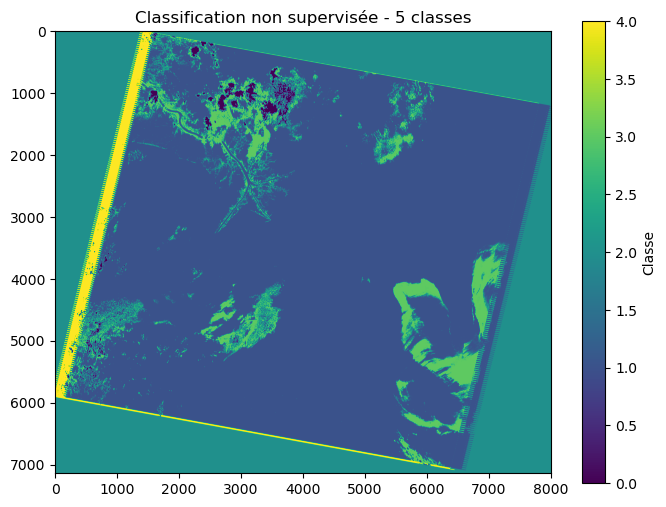

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

s2_np = np.stack(image_3, axis=-1)

# Redimensionner les données pour l'entraînement du modèle de clustering
rows, cols, bands = s2_np.shape
s2_reshaped = s2_np.reshape(rows * cols, bands)

# Définir le nombre de clusters (classes) souhaité
nombre_clusters = 5  # Vous pouvez ajuster ce nombre selon votre besoin

# Appliquer l'algorithme de clustering (K-means)
kmeans = KMeans(n_clusters=nombre_clusters, random_state=42)
kmeans.fit(s2_reshaped)

# Obtenir les étiquettes de cluster pour chaque pixel
labels = kmeans.labels_

# Redimensionner les étiquettes pour les remettre dans la forme de l'image
labels_reshaped = labels.reshape(rows, cols)

# Afficher l'image résultante des classes obtenues après le clustering
plt.figure(figsize=(8, 6))
plt.imshow(labels_reshaped, cmap='viridis')  # Vous pouvez changer la colormap selon votre préférence
plt.title(f'Classification non supervisée - {nombre_clusters} classes')
plt.colorbar(label='Classe')
plt.show()

## Normalized Difference Moisture Index (NDMI):

NDMI is susceptible to the moisture contents in vegetation. NDMI is employed to keep and eye on droughts while also monitoring fuel levels in fire prone regions. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.

$NDMI = \frac{NIR - SWIR1}{NIR + SWIR1}$

<Axes: >

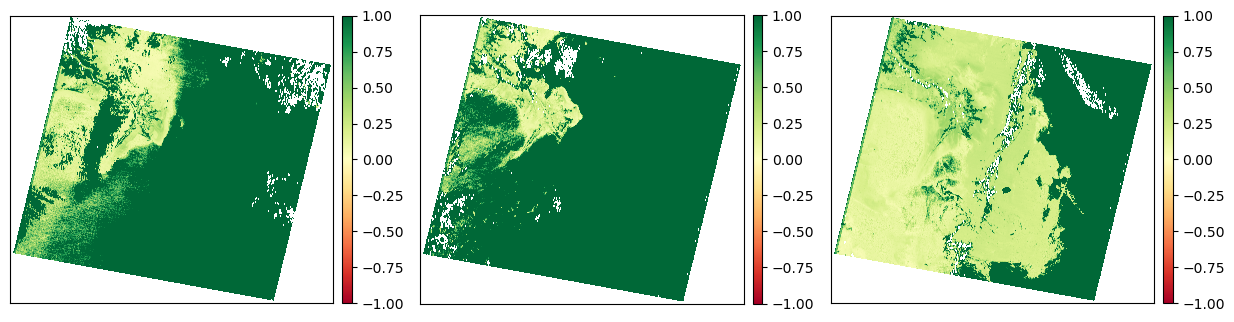

In [5]:
# create a new stack with NIR and SWIR
# Calculating MNDWI
NDMI_1 = es.normalized_diff(image_1[3], image_1[4]) # NIR - SWIR
NDMI_2 = es.normalized_diff(image_2[3], image_2[4]) # NIR - SWIR
NDMI_3 = es.normalized_diff(image_3[3], image_3[4]) # NIR - SWIR
# Plotting 
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
# Creating subplots
ep.plot_bands(arr = NDMI_1, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[0])
ep.plot_bands(arr = NDMI_2, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[1])
ep.plot_bands(arr = NDMI_3, cmap = "RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[2])

### Ferrous Minerals:

The ferrous minerals ratio highlights iron-bearing materials. It uses the ratio between the SWIR band and the NIR band.

$Ferrous\, Minerals\, Ratio = \frac{SWIR}{NIR}$

/tmp/ipykernel_16165/2473833888.py:1: RuntimeWarning: divide by zero encountered in divide
  fer_1 = image_1[4] / image_1[3]
/tmp/ipykernel_16165/2473833888.py:1: RuntimeWarning: invalid value encountered in divide
  fer_1 = image_1[4] / image_1[3]
/tmp/ipykernel_16165/2473833888.py:2: RuntimeWarning: divide by zero encountered in divide
  fer_2 = image_2[4] / image_2[3]
/tmp/ipykernel_16165/2473833888.py:2: RuntimeWarning: invalid value encountered in divide
  fer_2 = image_2[4] / image_2[3]
/tmp/ipykernel_16165/2473833888.py:3: RuntimeWarning: divide by zero encountered in divide
  fer_3 = image_3[4] / image_3[3]
/tmp/ipykernel_16165/2473833888.py:3: RuntimeWarning: invalid value encountered in divide
  fer_3 = image_3[4] / image_3[3]


Text(0.5, 1.0, '30 days after accident')

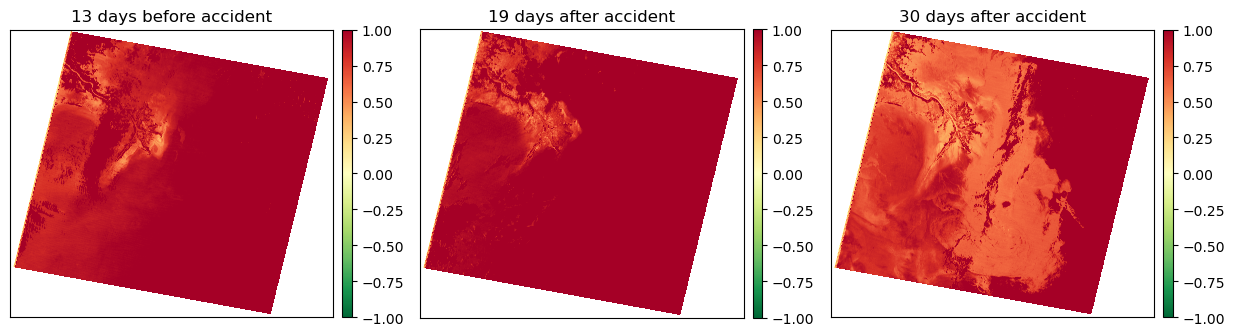

In [7]:
fer_1 = image_1[4] / image_1[3]
fer_2 = image_2[4] / image_2[3]
fer_3 = image_3[4] / image_3[3]
# Plotting VARI
fig, axs = plt.subplots(ncols = 3, figsize=(15, 25))
# Creating subplots
ep.plot_bands(arr = fer_1, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[0])
ep.plot_bands(arr = fer_2, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[1])
ep.plot_bands(arr = fer_3, cmap = "RdYlGn_r", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14), ax = axs[2])
# setting titles for each plot
axs[0].set_title('13 days before accident')
axs[1].set_title('19 days after accident')
axs[2].set_title('30 days after accident')

### Histogram

In [10]:
# HISTOGRAM
titles = ['red', 'green', 'blue']
ep.hist(
    arr = β, 
    colors = titles,
    title = titles,
    cols = 2,
    alpha = 0.5, 
    figsize = (9, 7)
)

plt.show()

NameError: name 'β' is not defined

## Normalizing data
Not sure if this is necessary

### NOTE:
'matplotlib' can only plot 8-bit images between the values of 0 - 255 or floating point values between 0 - 1.
Try dividing the Sentinel 2 data by 10000 before plotting it.

Try normalizing the data using the formula:
$z_i = \frac{x_i - min\left(x\right)}{max\left(x\right) - min\left(x\right)}$

In [15]:
stacked_s2_sentinel_img_divided = stacked_s2_sentinel_img / 10000

In [16]:
stacked_s2_sentinel_img_divided.shape

(7, 7141, 8031)

In [17]:
stacked_s2_sentinel_img.min(), stacked_s2_sentinel_img.max()

(0, 255)

In [18]:
stacked_s2_sentinel_img_divided.min(), stacked_s2_sentinel_img_divided.max()

(0.0, 0.0255)

In [19]:
# Normalize image
normalized_img = (stacked_s2_sentinel_img - stacked_s2_sentinel_img.min()) / (stacked_s2_sentinel_img.max() - stacked_s2_sentinel_img.min())

In [20]:
normalized_img.min(), normalized_img.max()

(0.0, 1.0)

### Visualize Bands:

The data contains 4 bands.

In [21]:
titles = [f'band-{i}' for i in range(0, 7)]

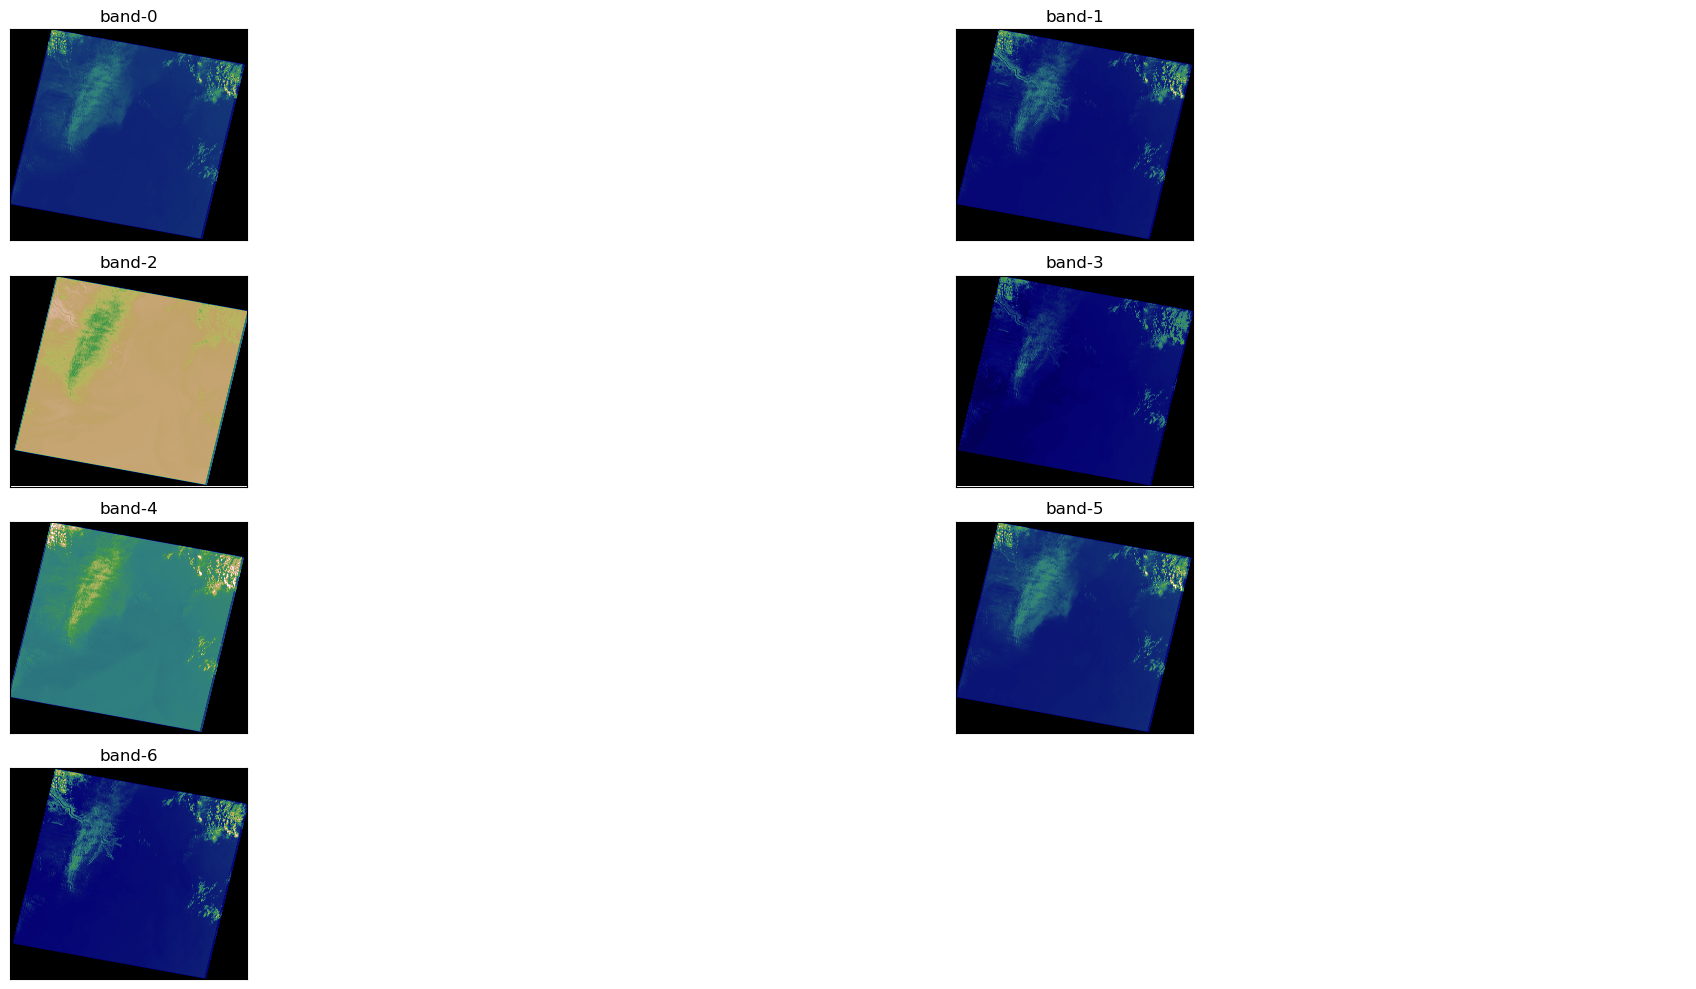

In [22]:
# Visualize each of the 4 bands-
ep.plot_bands(
    arr = stacked_s2_sentinel_img, cmap = 'gist_earth',
    figsize = (22, 10), cols = 2,
    cbar = False, title = titles)

plt.show()

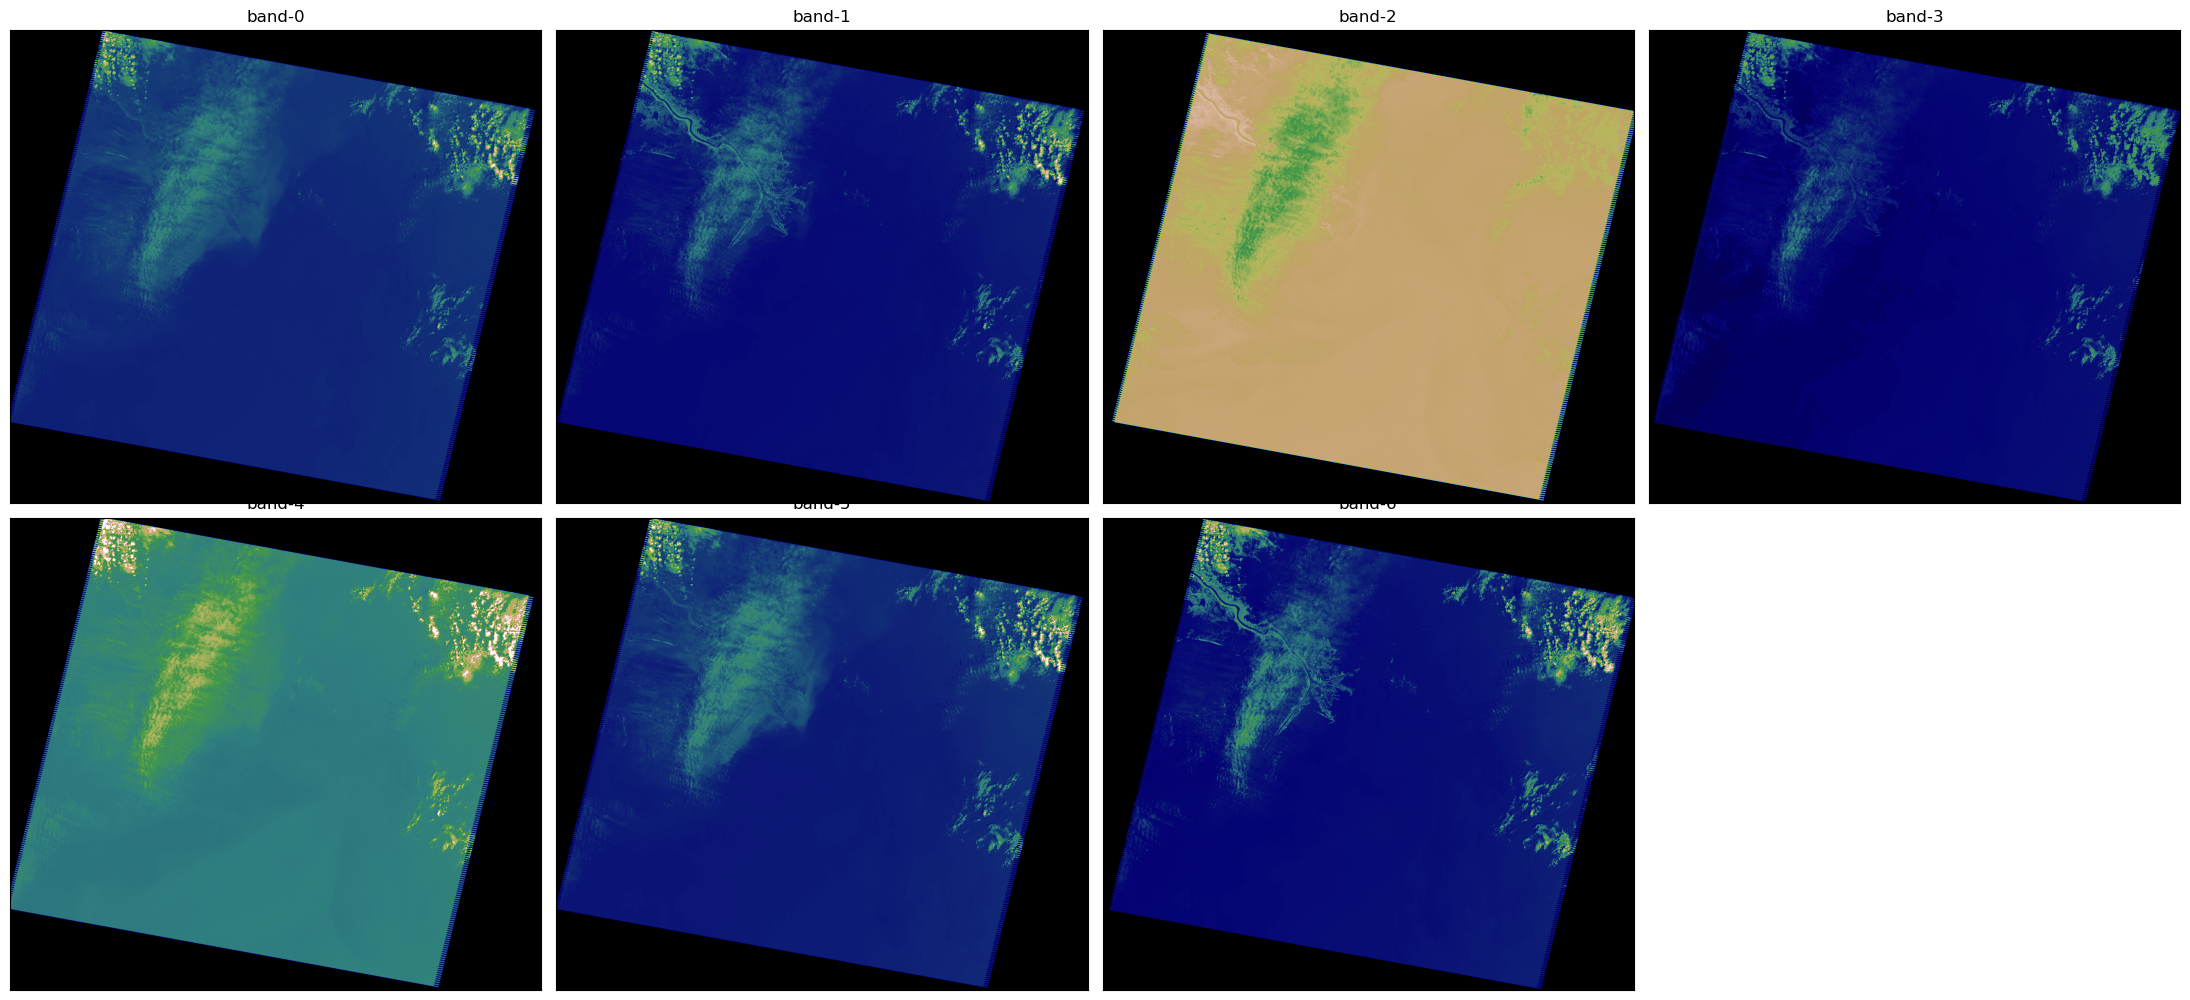

In [23]:
# Visualize each of the 4 bands
ep.plot_bands(
    arr = stacked_s2_sentinel_img_divided, cmap = 'gist_earth',
    figsize = (22, 10), cols = 4,
    cbar = False, title = titles)

plt.show()

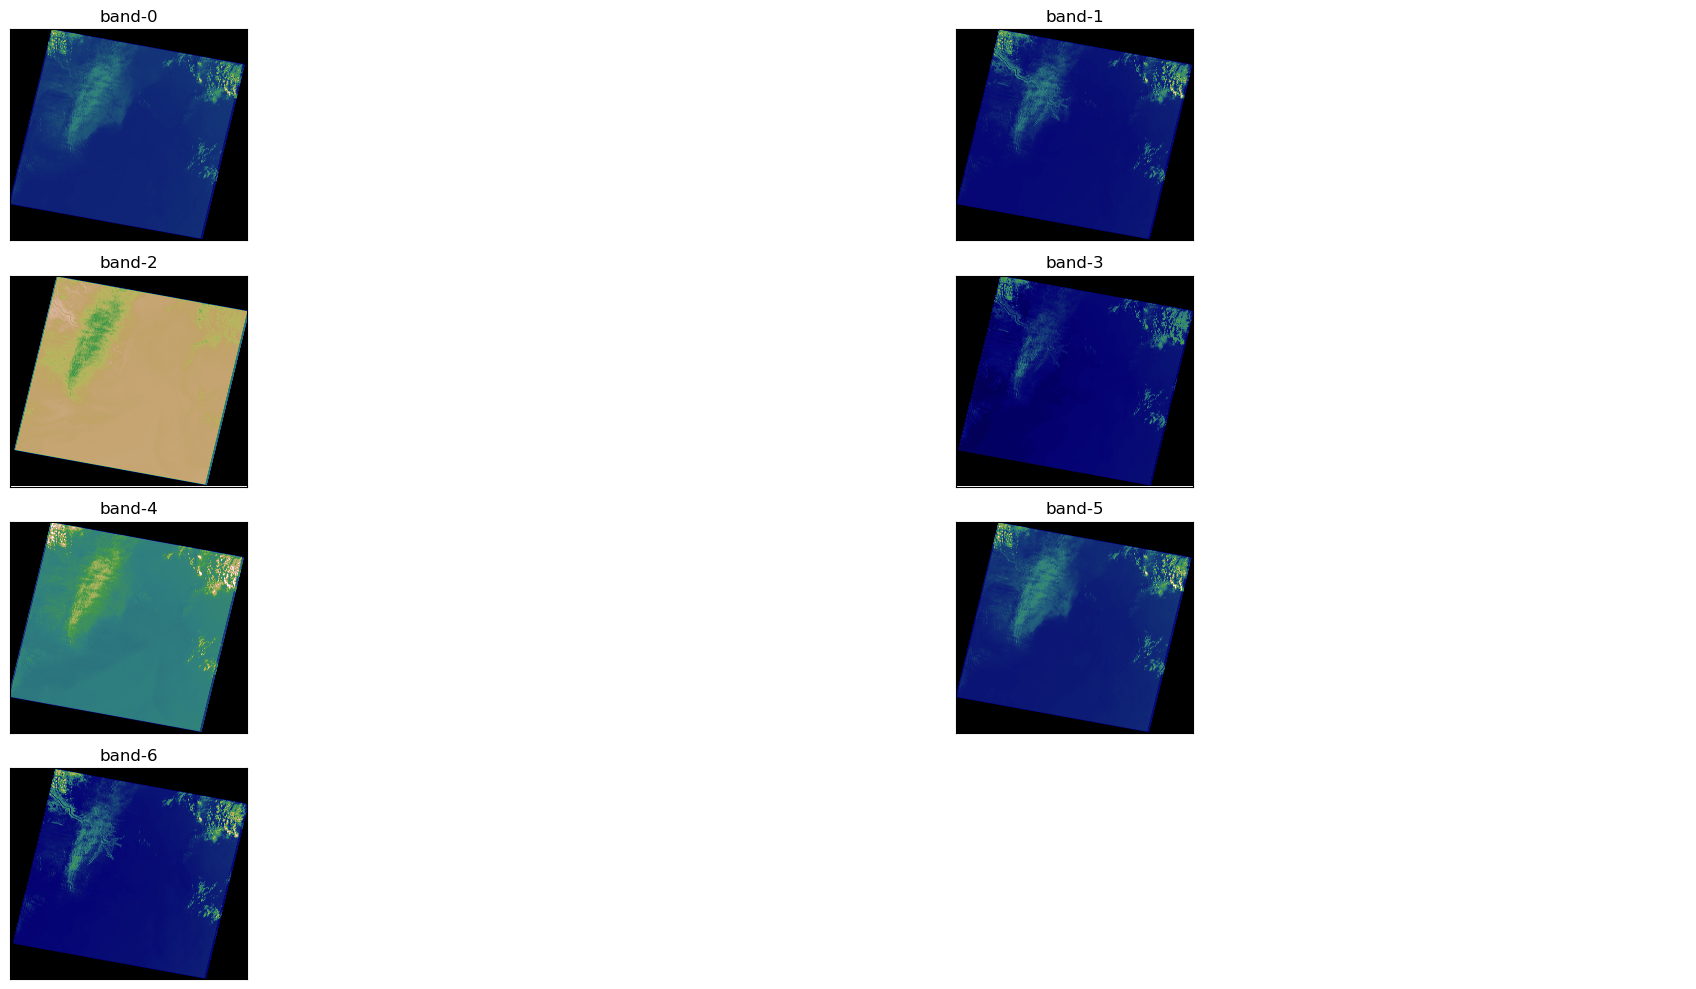

In [24]:
# Visualize each of the 4 bands using normalized image-
ep.plot_bands(
    arr = normalized_img, cmap = 'gist_earth',
    figsize = (22, 10), cols = 2,
    cbar = False, title = titles)

plt.show()

### RGB Composite Image:

The downloaded data has multiple bands containing data ranging from visible spectrum to infrared. To effectively visualize this data, it is necessary to create an RGB Composite image.

To plot RGB composite images, you will plot the red, green and blue bands, which are bands 4, 3 and 2, respectively. The indices for red band = 3, green band = 2 and blue band = 1.

In [25]:
s2_sentinel_bands
ValueError: plot_bands expects the number of plot titles to equal the number of array raster layers.

SyntaxError: invalid syntax (3622594048.py, line 2)

In [ ]:
# Plot RGB composite image-
'''
Arguments:

arr : numpy array
ValueError: plot_bands expects the number of plot titles to equal the number of array raster layers.
    An n-dimensional array in rasterio band order (bands, rows, columns)
    containing the layers to plot.

rgb : list (default = (0, 1, 2))
    Indices of the three bands to be plotted.
'''
rgb = ep.plot_rgb(
    arr = stacked_s2_sentinel_img, rgb = (0, 1, 2),
    figsize =(20, 10) , title = titles)

plt.show()

In [ ]:
# Create a numpy array copy
sentinel_img = np.copy(stacked_s2_sentinel_img)

In [ ]:
rgb = ep.plot_rgb(
    arr = normalized_img, rgb = (3, 2, 1),
    figsize =(20, 10) , title = titles)

plt.show()

In [ ]:
rgb = ep.plot_rgb(
    arr = normalized_img, rgb = (1, 2, 3),
    figsize =(20, 10) , title = titles)

plt.show()

### RGB Composite image using stretch:

It can happen that the created RGB Composite image can be dark due to skewness in pixel brightness towards 0 values. To alleviate this problem, the pixel brightness values in the image can be stretched with the help of 'stretch = True' parameter. This will extra-polate the pixel brightness values to the entire range of 0-255 values in an attempt to increase the contrast of the image.

'str_clip' parameter will specify the amount of tails of data to be clipped.

In [ ]:
# RGB composite image with stretch
rgb_stretch = ep.plot_rgb(
        arr = stacked_s2_sentinel_img, rgb = (0, 1, 2),
        stretch = True, str_clip = 0.3,
        figsize =(20, 14)
        )

plt.show()

### Histograms:

Visualizing the distribution of pixel values within the different bands can be helpful in further analysis.

### Normalized Difference Vegetation Index (NDVI)

To figure out green vegetation within an image, specific wavelengths of visible and Near-Infrared (NIR) reflected by the plants are to be analysed.
NDVI computes this desired vegetation as the difference between NIR (strongly reflected by vegetation) and red light (absorbed by vegetation).

$NDVI \in \left(-1, +1\right)$

$NDVI = \frac{NIR - Red}{NIR + Red}$

For negative values, it's probably water. Whereas, for values close to +1, it’s probably dense green leaves. While, values close to zero might indicate  an urbanized area which doesn't have much green leaves.

In [ ]:
ndvi = es.normalized_diff(stacked_s2_sentinel_img[3], stacked_s2_sentinel_img[2])
# ndvi = es.normalized_diff(arr_st[7], arr_st[3])

In [ ]:
ndvi.min(), ndvi.max()

In [ ]:
ep.plot_bands(
    arr = ndvi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (10, 14)
)

plt.show()

### Soil Adjusted Vegetation Index (SAVI):

SAVI is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low.

$SAVI = \frac{NIR - Red}{NIR + Red + L} \times (1 + L)$

The value of _L_ depends on the geographic location's amount of vegetation. Usually:

- for areas having no green vegetation cover, L = 1
- for areas of moderate green vegetation cover, L = 0.5
- for areas of high vegetation cover, L = 0 (this is equivalent to NDVI method of above)

$SAVI \in \left(-1.0, +1.0\right)$

In [ ]:
L = 0.4

savi = ((stacked_s2_sentinel_img[3] - stacked_s2_sentinel_img[2]) / (stacked_s2_sentinel_img[3] + stacked_s2_sentinel_img[2] + L)) * (1 + L)

In [ ]:
savi.min(), savi.max()

In [ ]:
ep.plot_bands(
    arr = savi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    # cols = 1, vmin = 0, vmax = 20851.73,
    figsize = (10, 14)
)

plt.show()

### Visible Atmospherically Resistant Index (VARI):

VARI is constructed to highlight vegetation in the visible spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

$VARI = \frac{Green - Red}{Green + Red - Blue}$


In [ ]:
vari = (stacked_s2_sentinel_img[1] - stacked_s2_sentinel_img[2]) / (stacked_s2_sentinel_img[1] + stacked_s2_sentinel_img[2] - stacked_s2_sentinel_img[0])

In [ ]:
vari.min(), vari.max()

In [ ]:
ep.plot_bands(
    arr = vari, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (10, 14)
)

plt.show()

### Water Indices:

Remote sensing satellites such as Sentinel-2, etc. have consistently provided data which are helpful for extracting different types of land cover such as forest and water. Amongst the various proposed surface water extraction techniques, index-based methods are favored due to their simplicity and computational ease.


### Modified Normalized Difference Water Index (MNDWI):

MDWI employs SWIR and Green bands for enhancing water features while diminishing built-up area features which are often correlated with open water in other indices.

$MNDWI = \frac{Green - SWIR}{Green + SWIR}$

In [ ]:
mndwi = es.normalized_diff(stacked_s2_sentinel_img[1], stacked_s2_sentinel_img[3])

In [ ]:
mndwi.min(), mndwi.max()

In [ ]:
ep.plot_bands(
    arr = mndwi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()

### Normalized Difference Moisture Index (NDMI):

NDMI is susceptible to the moisture contents in vegetation. NDMI is employed to keep and eye on droughts while also monitoring fuel levels in fire prone regions. It uses NIR and SWIR bands to create a ratio designed to mitigate illumination and atmospheric effects.

$NDMI = \frac{NIR - SWIR1}{NIR + SWIR1}$

In [ ]:
ndmi = es.normalized_diff(stacked_s2_sentinel_img[3], stacked_s2_sentinel_img[2])

In [ ]:
ep.plot_bands(
    arr = ndmi, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()

### Geology Indices:

Remote sensing can also be used for mineral exploration. It can be used to geolocate populated areas, roads, tracks, etc.


### Clay Minerals:

The clay ratio is a ratio of the SWIR1 and SWIR2 bands. This ratio uses the fact that hydrous minerals such as clays, alunite absorb radiation in the 2.0 to 2.3 micron portion of the spectrum. This index mitigates illumination changes due to terrain since it is a ratio.

$Clay\, Minerals\, Ratio = \frac{SWIR1}{SWIR2}$

In [ ]:
cmr = np.divide(stacked_s2_sentinel_img[0], stacked_s2_sentinel_img[2])

In [ ]:
ep.plot_bands(
    arr = cmr, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()

### Ferrous Minerals:

The ferrous minerals ratio highlights iron-bearing materials. It uses the ratio between the SWIR band and the NIR band.

$Ferrous\, Minerals\, Ratio = \frac{SWIR}{NIR}$

In [ ]:
s2_sentinel_bands

In [ ]:
fmr = np.divide(stacked_s2_sentinel_img[1], stacked_s2_sentinel_img[3])

In [ ]:
ep.plot_bands(
    arr = fmr, cmap = "RdYlGn",
    cols = 1, vmin = -1, vmax = 1,
    figsize = (12, 10)
)

plt.show()